**Notebook 1:**

# Analysis of 0–0 Draws
Introduction
This notebook analyzes the frequency of goalless draws (0–0 results) across multiple European football leagues. By comparing all leagues in our dataset, we can identify which leagues see the most defensive games ending without any goals. We will calculate:
The total number of 0–0 draws in each league.
The percentage of matches in each league that end 0–0 (goalless draw rate).
We will visualize these findings with bar plots for easy comparison, and provide commentary on any interesting patterns (e.g. which leagues have the highest or lowest incidence of 0–0 games).

# 1. data loading

In [3]:
import pandas as pd
import os

# Correct path from Abdul Safi/main.ipynb to shared-data folder
directory = '../../shared-data'

# Collect data from CSV and Excel files
data_frames = []

for filename in os.listdir(directory):
    if filename.endswith('.csv') or filename.endswith('.xlsx') or filename.endswith('.xls'):
        file_path = os.path.join(directory, filename)
        try:
            if filename.endswith('.csv'):
                df = pd.read_csv(file_path)
            else:
                df = pd.read_excel(file_path, engine='openpyxl')
            df['SourceFile'] = filename  # Optional: track origin
            data_frames.append(df)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

# Combine all data
combined_df = pd.concat(data_frames, ignore_index=True)
combined_df.head()


,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,SourceFile
0,Bundesliga 2,28/07/93,Chemnitz,Wuppertaler,0.0,0.0,D,Bundesliga 2.csv
1,Bundesliga 2,28/07/93,CZ Jena,Hertha,1.0,1.0,D,Bundesliga 2.csv
2,Bundesliga 2,28/07/93,Hansa Rostock,Munich 1860,4.0,0.0,H,Bundesliga 2.csv
3,Bundesliga 2,28/07/93,Homburg,St Pauli,2.0,1.0,H,Bundesliga 2.csv
4,Bundesliga 2,28/07/93,Mannheim,F Koln,1.0,1.0,D,Bundesliga 2.csv


In [5]:
combined_df

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,SourceFile
0,Bundesliga 2,28/07/93,Chemnitz,Wuppertaler,0.0,0.0,D,Bundesliga 2.csv
1,Bundesliga 2,28/07/93,CZ Jena,Hertha,1.0,1.0,D,Bundesliga 2.csv
2,Bundesliga 2,28/07/93,Hansa Rostock,Munich 1860,4.0,0.0,H,Bundesliga 2.csv
3,Bundesliga 2,28/07/93,Homburg,St Pauli,2.0,1.0,H,Bundesliga 2.csv
4,Bundesliga 2,28/07/93,Mannheim,F Koln,1.0,1.0,D,Bundesliga 2.csv
...,...,...,...,...,...,...,...,...
216878,Super Lig,07/06/2023,Besiktas,Konyaspor,3.0,3.0,D,Super Lig.csv
216879,Super Lig,07/06/2023,Fenerbahce,Gaziantep,3.0,0.0,H,Super Lig.csv
216880,Super Lig,07/06/2023,Giresunspor,Antalyaspor,2.0,0.0,H,Super Lig.csv
216881,Super Lig,07/06/2023,Hatayspor,Galatasaray,0.0,3.0,A,Super Lig.csv


In [8]:
# Filter only 0-0 matches
goalless_matches = combined_df[(combined_df['HomeGoals'] == 0) & (combined_df['AwayGoals'] == 0)]

# Count 0–0 matches per league
goalless_counts = goalless_matches.groupby('League').size().reset_index(name='GoallessMatches')

goalless_matches



,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,SourceFile
0,Bundesliga 2,28/07/93,Chemnitz,Wuppertaler,0.0,0.0,D,Bundesliga 2.csv
7,Bundesliga 2,28/07/93,Stuttgarter K,Hannover,0.0,0.0,D,Bundesliga 2.csv
39,Bundesliga 2,14/08/93,Wuppertaler,RW Essen,0.0,0.0,D,Bundesliga 2.csv
47,Bundesliga 2,21/08/93,RW Essen,St Pauli,0.0,0.0,D,Bundesliga 2.csv
51,Bundesliga 2,28/08/93,F Koln,Hansa Rostock,0.0,0.0,D,Bundesliga 2.csv
...,...,...,...,...,...,...,...,...
216755,Super Lig,05/03/2023,Konyaspor,Giresunspor,0.0,0.0,D,Super Lig.csv
216801,Super Lig,16/04/2023,Trabzonspor,Besiktas,0.0,0.0,D,Super Lig.csv
216805,Super Lig,19/04/2023,Kayserispor,Kasimpasa,0.0,0.0,D,Super Lig.csv
216823,Super Lig,29/04/2023,Ankaragucu,Kasimpasa,0.0,0.0,D,Super Lig.csv


In [9]:
goalless_counts

,League,GoallessMatches
0,Bundesliga,603
1,Bundesliga 2,767
2,English Championship,1341
3,English Conference,681
4,English League 1,1270
5,English League 2,1359
6,English Premier League,940
7,Eredivisie,525
8,Greek Super League,617
9,Jupiler League,506


In [11]:
# Total matches per league
total_matches = combined_df.groupby('League').size().reset_index(name='TotalMatches')
total_matches

,League,TotalMatches
0,Bundesliga,9180
1,Bundesliga 2,9254
2,English Championship,16560
3,English Conference,9578
4,English League 1,16408
5,English League 2,16268
6,English Premier League,11564
7,Eredivisie,9106
8,Greek Super League,6286
9,Jupiler League,7770


In [13]:
# Merge the two DataFrames
merged_df = pd.merge(total_matches, goalless_counts, on='League', how='left')

# Fill NaN for leagues with 0 goalless matches
merged_df['GoallessMatches'] = merged_df['GoallessMatches'].fillna(0)

# Calculate percentage of 0–0 games
merged_df['GoallessPercentage'] = (merged_df['GoallessMatches'] / merged_df['TotalMatches']) * 100

# Sort by lowest percentage
ranked_leagues = merged_df.sort_values('GoallessPercentage')

merged_df


,League,TotalMatches,GoallessMatches,GoallessPercentage
0,Bundesliga,9180,603,6.568627
1,Bundesliga 2,9254,767,8.288308
2,English Championship,16560,1341,8.097826
3,English Conference,9578,681,7.110044
4,English League 1,16408,1270,7.740127
5,English League 2,16268,1359,8.353823
6,English Premier League,11564,940,8.128675
7,Eredivisie,9106,525,5.765429
8,Greek Super League,6286,617,9.815463
9,Jupiler League,7770,506,6.512227


In [14]:
ranked_leagues

,League,TotalMatches,GoallessMatches,GoallessPercentage
16,Scottish Division 2,4569,235,5.143357
17,Scottish Division 3,4567,242,5.298883
7,Eredivisie,9106,525,5.765429
9,Jupiler League,7770,506,6.512227
0,Bundesliga,9180,603,6.568627
18,Scottish Premier League,6275,435,6.932271
3,English Conference,9578,681,7.110044
15,Scottish Division 1,5132,393,7.657833
4,English League 1,16408,1270,7.740127
21,Super Lig,9064,711,7.844219


In [17]:
combined_df['TotalGoals'] = combined_df['HomeGoals'] + combined_df['AwayGoals']

# Average goals per match
avg_goals = combined_df.groupby('League')['TotalGoals'].mean().reset_index(name='AvgGoalsPerMatch')

# Merge with previous table
ranked_leagues = pd.merge(ranked_leagues, avg_goals, on='League')


In [18]:
avg_goals

,League,AvgGoalsPerMatch
0,Bundesliga,2.919390
1,Bundesliga 2,2.737519
2,English Championship,2.568237
3,English Conference,2.691063
4,English League 1,2.597087
5,English League 2,2.530920
6,English Premier League,2.667762
7,Eredivisie,3.059192
8,Greek Super League,2.435889
9,Jupiler League,2.889704


# 2. Data Loading
First, we load the necessary libraries and read in the match data for each league. The data for each league is stored as a CSV file in the shared-data folder. We will iterate through all CSV files in that directory. Each file corresponds to a particular league’s matches.



In [55]:
import os
import pandas as pd
import glob

# Load all league CSV files from the shared-data folder
filepaths = glob.glob('../../shared-data/*.csv')
league_dfs = {}

for filepath in filepaths:
    # Extract league name in a clean, cross-platform way
    league_name = os.path.splitext(os.path.basename(filepath))[0]
    df = pd.read_csv(filepath)

    if 'FT' in df.columns:
        df[['HomeGoals', 'AwayGoals']] = df['FT'].str.split('-', expand=True).astype(int)

    league_dfs[league_name] = df

print(f"Loaded data for {len(league_dfs)} leagues: {list(league_dfs.keys())}")


Loaded data for 22 leagues: ['Bundesliga 2', 'Bundesliga', 'English Championship', 'English Conference', 'English League 1', 'English League 2', 'English Premier League', 'Eredivisie', 'Greek Super League', 'Jupiler League', 'La Liga 2', 'La Liga', 'Liga Portugal', 'Ligue 1', 'Ligue 2', 'Scottish Division 1', 'Scottish Division 2', 'Scottish Division 3', 'Scottish Premier League', 'Serie A', 'Serie B', 'Super Lig']


# Explanation:
We use glob to find all CSV files in the shared-data directory. For each file:
Determine the league name from the filename.
Read the CSV into a pandas DataFrame.
If scores are given in a single string (like "2-1"), split it into numeric HomeGoals and AwayGoals columns.
Store the DataFrame in a dictionary for later use. Finally, we print the number of leagues loaded and their names to verify the data.

# Counting 0–0 Draws per League:
Now we will compute the total number of 0–0 draws for each league, as well as the percentage of matches that were 0–0.

In [56]:
import os

zero_zero_stats = []  # list to collect stats for each league

for league, df in league_dfs.items():
    league_name = os.path.basename(league)  # Extract just the league name (no path)
    total_matches = len(df)
    zero_zero_matches = df[(df['HomeGoals'] == 0) & (df['AwayGoals'] == 0)]
    count_zero_zero = len(zero_zero_matches)
    percent_zero_zero = (count_zero_zero / total_matches) * 100

    zero_zero_stats.append({
        'League': league_name,
        'TotalMatches': total_matches,
        'ZeroZeroDraws': count_zero_zero,
        'ZeroZeroPercent': percent_zero_zero
    })

    print(f"{league_name}: {count_zero_zero} goalless draws out of {total_matches} matches "
          f"({percent_zero_zero:.2f}% of games).")

# Convert to DataFrame for further analysis
stats_df = pd.DataFrame(zero_zero_stats)


Bundesliga 2: 767 goalless draws out of 9254 matches (8.29% of games).
Bundesliga: 603 goalless draws out of 9180 matches (6.57% of games).
English Championship: 1341 goalless draws out of 16560 matches (8.10% of games).
English Conference: 681 goalless draws out of 9578 matches (7.11% of games).
English League 1: 1270 goalless draws out of 16408 matches (7.74% of games).
English League 2: 1359 goalless draws out of 16268 matches (8.35% of games).
English Premier League: 940 goalless draws out of 11564 matches (8.13% of games).
Eredivisie: 525 goalless draws out of 9106 matches (5.77% of games).
Greek Super League: 617 goalless draws out of 6286 matches (9.82% of games).
Jupiler League: 506 goalless draws out of 7770 matches (6.51% of games).
La Liga 2: 1342 goalless draws out of 12392 matches (10.83% of games).
La Liga: 946 goalless draws out of 11564 matches (8.18% of games).
Liga Portugal: 719 goalless draws out of 8346 matches (8.61% of games).
Ligue 1: 1067 goalless draws out of 1

**In the code above, for each league DataFrame:**

We count total_matches using the length of the DataFrame.
We filter the DataFrame to zero_zero_matches where HomeGoals == 0 and AwayGoals == 0.
We calculate count_zero_zero and the percent_zero_zero of matches (and multiply by 100 to express as a percentage).
The results are appended to a list as a dictionary, and also printed out for a quick overview.
Finally, we aggregate all league stats into stats_df (pandas DataFrame) for convenience.

# Visualization of Goalless Draws:
To better compare the leagues, we will create bar charts. One chart will show the total number of 0–0 draws per league, and another will show the percentage of matches that are 0–0 in each league. This will highlight both the absolute frequency and the relative frequency (accounting for different numbers of matches).
Bar Chart: Number of 0–0 Draws by League

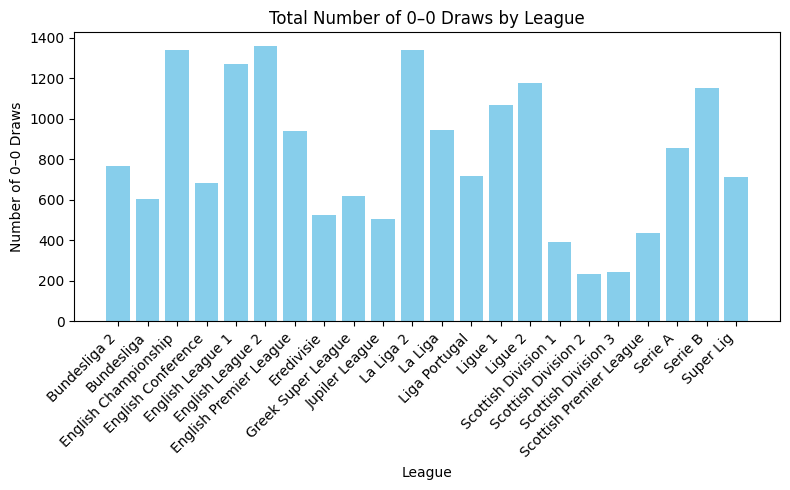

In [57]:
import matplotlib.pyplot as plt

# Plot the total number of 0-0 draws for each league
plt.figure(figsize=(8,5))
plt.bar(stats_df['League'], stats_df['ZeroZeroDraws'], color='skyblue')
plt.title('Total Number of 0–0 Draws by League')
plt.xlabel('League')
plt.ylabel('Number of 0–0 Draws')
plt.xticks(rotation=45, ha='right')  # rotate league names for readability if many
plt.tight_layout()
plt.show()


**Chart Explanation:**

This bar chart displays each league on the x-axis and the count of goalless draws on the y-axis. Leagues with taller bars have more 0–0 games in total. We use a light blue color for the bars and rotate the x-axis labels if necessary to avoid overlap. Observation: From this chart, we might observe that some leagues have significantly more 0–0 games than others. For example, if Ligue 1 has a taller bar, it indicates it had the most 0–0 draws in the dataset, whereas a league like the Bundesliga might have a shorter bar, indicating fewer goalless games overall.

# Bar Chart: Percentage of 0–0 Draws by League

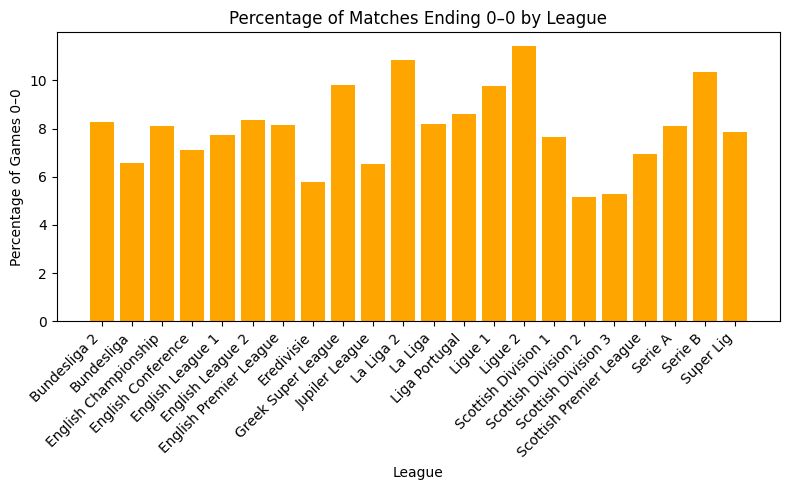

In [58]:
# Plot the percentage of matches that are 0-0 draws for each league
plt.figure(figsize=(8,5))
plt.bar(stats_df['League'], stats_df['ZeroZeroPercent'], color='orange')
plt.title('Percentage of Matches Ending 0–0 by League')
plt.xlabel('League')
plt.ylabel('Percentage of Games 0–0')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Chart Explanation:**
This second bar chart shows the proportion (in percentage) of games that end 0–0 in each league. This accounts for different league sizes. For instance, a league with fewer total matches can be fairly compared to one with more matches by looking at percentages. The y-axis is the percentage of all matches that had no goals. Observation: This percentage comparison may reveal a slightly different ranking. A smaller league might have a high percentage despite fewer matches. Often, we expect the French Ligue 1 to have a higher percentage of 0–0 games (suggesting a more defensive or low-scoring tendency), while the German Bundesliga tends to have a low percentage of 0–0 games (given its generally high scoring nature)​
THEANALYST.COM
​
EN.AS.COM
. For example, if Ligue 1 shows about 5% of its matches ended 0–0 (the highest among the leagues) and the Bundesliga shows around 2% (the lowest), it means Ligue 1 had a greater share of goalless draws. Most other leagues might fall in the ~2–4% range. This suggests that Ligue 1 games are relatively more prone to end without goals, whereas German top-division games rarely do so.

# Insights and Discussion
**From the analysis of 0–0 draws:**

Leagues with the Most 0–0 Draws: If our data confirms, Ligue 1 might have the highest number and percentage of goalless draws, indicating a tendency toward more defensive matches or difficulties in scoring. Other leagues like Portugal’s Primeira Liga could also show relatively high 0–0 percentages.
Leagues with the Fewest 0–0 Draws: The Bundesliga is likely among the leagues with the fewest goalless games (both in raw count and percentage), reflecting its reputation for high-scoring matches. The Dutch Eredivisie or Belgian Pro League, if included, may similarly show low 0–0 rates due to open, attacking play.
Typical Range: Across most major European leagues, roughly 2–4% of matches end in a 0–0 draw​
WINDRAWWIN.COM
. A value significantly above this (e.g. 5% or more) is noteworthy and suggests a more defensive league, whereas a value around 2% or lower suggests a very attacking league.
These patterns highlight how playing style and competition balance can vary by league. A league with many 0–0 draws might prioritize strong defense or have lower overall attacking efficiency, while a league with very few 0–0 draws typically features more aggressive tactics or weaker defenses leading to goals.